In [1]:
import pandas as pd
import numpy as np

In [54]:
suicide_info = pd.read_csv("master.csv")
suicide_info.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
# rank suicide no after 2005
suicide_rank_country = suicide_info.loc[:,['country','year', 'suicides_no']].copy()
# suicide_rank_country = suicide_rank_country[suicide_rank_country.year > 2005]
suicide_rank_country = suicide_rank_country.groupby('country')[['suicides_no']].sum().reset_index().sort_values(['suicides_no'], ascending=False)
suicide_rank_country.head()

,country,suicides_no
75,Russian Federation,1209742
98,United States,1034013
46,Japan,806902
33,France,329127
95,Ukraine,319950


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

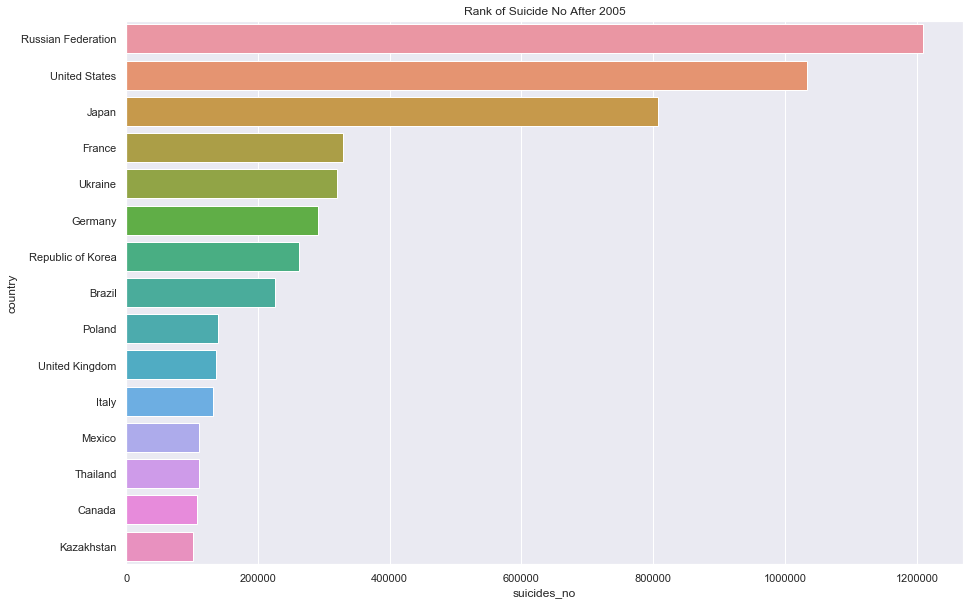

In [5]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="suicides_no", y="country", data=suicide_rank_country.head(15)).set_title("Rank of Suicide No After 2005")
plt.show()

In [6]:
# Suicide number group by gender 
suicide_gender_year = suicide_info.loc[:,['sex', 'suicides_no', 'year']].copy().groupby(['year', 'sex'])[['suicides_no']].sum().reset_index()
suicide_male_year = suicide_gender_year[suicide_gender_year.sex == "male"]
suicide_female_year = suicide_gender_year[suicide_gender_year.sex == "female"]

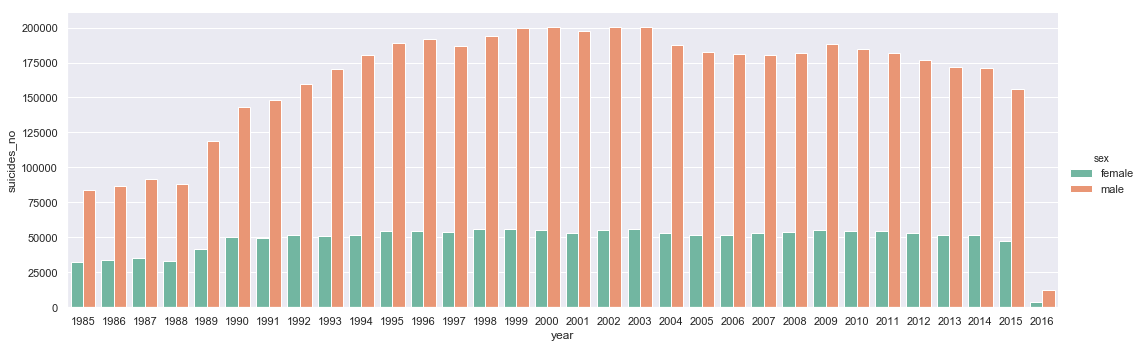

In [7]:
ax = sns.catplot(x = "year", y = "suicides_no", 
            hue = "sex", 
            data = suicide_gender_year, kind = "bar", palette="Set2",
            height=5, aspect=3)

In [8]:
!pip install folium

In [9]:
import folium

In [10]:
m = folium.Map(location=[20,0], tiles="Mapbox Bright", zoom_start=2)
coutry_geo = 'country.json'

In [11]:
suicide_rate_by_contry = pd.read_csv("suicide-rates-by-country.csv")
suicide_rate_by_contry_2005 = suicide_rate_by_contry.loc[suicide_rate_by_contry.Year == 2005].copy()
suicide_rate_by_contry_2005['rate'] = suicide_rate_by_contry_2005['suicide rate (age-adjusted suicides per 100,000 people)']
suicide_rate_by_contry_2005.head()

,Entity,Code,Year,"suicide rate (age-adjusted suicides per 100,000 people)",rate
2,Afghanistan,AFG,2005,6.684385,6.684385
5,Albania,ALB,2005,7.699330,7.699330
8,Algeria,DZA,2005,4.848770,4.848770
11,Andorra,AND,2005,5.362179,5.362179
14,Angola,AGO,2005,14.554677,14.554677


In [12]:
folium.Choropleth(
 geo_data=coutry_geo,
 name='Suicide No',
 data=suicide_rate_by_contry_2005,
 columns=['Entity', 'rate'],
 key_on='feature.properties.name',
 fill_color='YlGn',
 legend_name='Suicide Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

In [13]:
m

In [ ]:
sns.pairplot(suicide_info)
plt.show()

In [ ]:
suicide_info.head()

In [14]:
suicide_rate_after_2008 = suicide_info[suicide_info.year >= 2008]

In [15]:
suicide_rate_after_2008.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
228,Albania,2008,male,25-34 years,21,172855,12.15,Albania2008,NaN,"12,881,352,688",4672,Generation X
229,Albania,2008,male,35-54 years,37,377119,9.81,Albania2008,NaN,"12,881,352,688",4672,Boomers
230,Albania,2008,male,55-74 years,21,228672,9.18,Albania2008,NaN,"12,881,352,688",4672,Silent
231,Albania,2008,female,75+ years,5,59369,8.42,Albania2008,NaN,"12,881,352,688",4672,Silent
232,Albania,2008,female,15-24 years,20,276073,7.24,Albania2008,NaN,"12,881,352,688",4672,Millenials


In [19]:
# North America
suicide_with_ec = suicide_rate_after_2008.loc[:,['country', 'year', 'suicides/100k pop']].copy()
suicide_with_ec = suicide_with_ec[(suicide_with_ec.country == "Canada") | (suicide_with_ec.country == "United States")].groupby('year')[['suicides/100k pop']].sum().reset_index()
economic_risk_year = 2008

In [22]:
suicide_with_ec

,year,suicides/100k pop
0,2008,280.83
1,2009,284.86
2,2010,291.56
3,2011,287.38
4,2012,293.02
5,2013,299.76
6,2014,171.33
7,2015,175.41


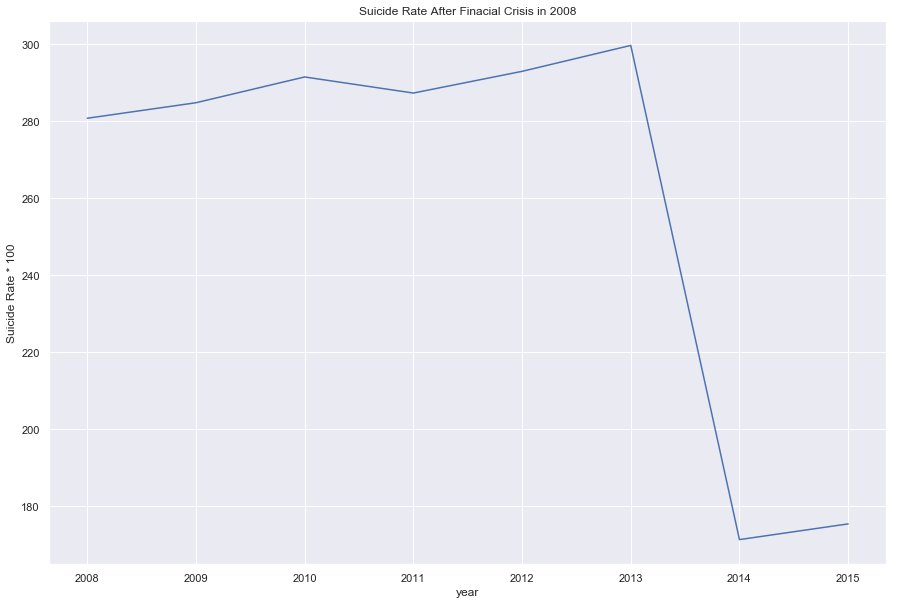

In [21]:
ax = sns.lineplot(x='year', y = 'suicides/100k pop', data = suicide_with_ec)
ax.set(ylabel = "Suicide Rate * 100")
plt.title("Suicide Rate After Finacial Crisis in 2008")
plt.show()

In [55]:
suicide_info.drop(columns=['HDI for year'], inplace=True)

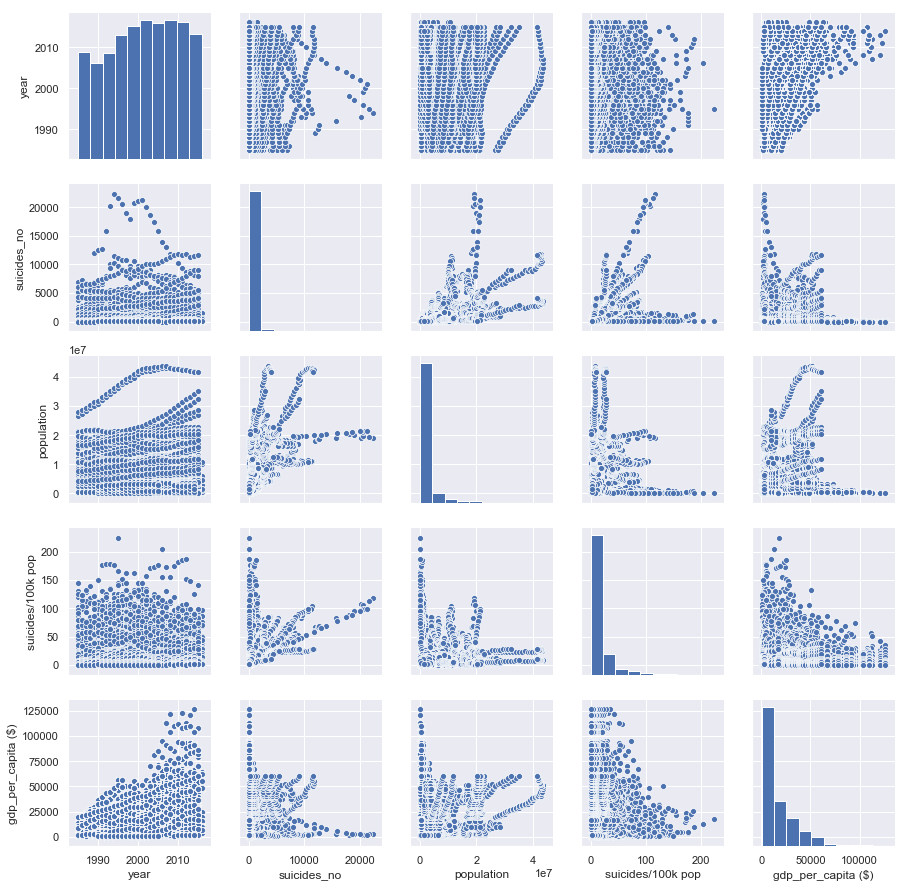

In [56]:
sns.pairplot(suicide_info)
plt.show()

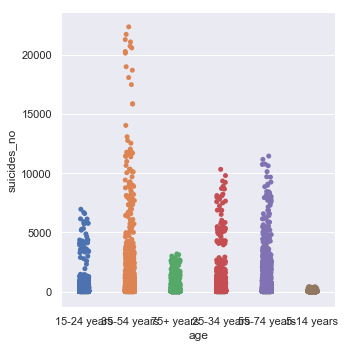

In [58]:
sns.catplot(x="age", y="suicides_no", data=suicide_info)
plt.show()